In [2]:
import pandas as pd
import re
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
file = open('Brokers3.csv','r')

number_per = []
lines = []
for line in file:
    line = line.split('], ')
    number_per.append(len(line))
    lines.append(line)

In [4]:

dates = []
companies= []
opinions = []
pre_preds = []
preds = []
Classes = []


for i in range(len(lines)):
    date = []
    company = []
    opinion = []
    pre_pred = []
    pred = []
    Class = []
    for j in range(len(lines[i])):
        date.append(re.sub('\[', '', lines[i][j].split(',')[0]))
        company.append(lines[i][j].split(',')[1])
        opinion.append(lines[i][j].split(',')[2])
        pre_pred.append(lines[i][j].split(',')[3])
        pred.append(lines[i][j].split(',')[4])
        Class.append(lines[i][j].split(',')[5])
    dates.append(date)
    companies.append(company)
    opinions.append(opinion)
    pre_preds.append(pre_pred)
    preds.append(pred)
    Classes.append(Class)


In [5]:
file = open('stocks_name.txt','r')

Files = []
comp = []
for line in file:
    line = re.sub('\n', '', line)
    line = line.split('\t')
    if line[1][2:4] == '.A':
        Files.append('csv/BT-A.L.csv')
    elif line[1][2] == '.':
        Files.append('csv/' + line[1] + 'L.csv')
    else:
        Files.append('csv/' + line[1] + '.L.csv')
    comp.append(line[1])


In [6]:
#
C = 'AAL'
a = 1
for c in comp:
    if c == C:
        target = a
    a+=1

df = pd.read_csv('csv/' + C + '.L.csv')

# Sort DataFrame by date
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1320.0,1320.000000,1282.5,1292.0,1005.497192,3800522
2014-01-03,1289.0,1301.500000,1275.0,1297.0,1009.388428,2110659
2014-01-06,1290.5,1300.000000,1271.5,1275.0,992.266846,4644143
2014-01-07,1280.0,1290.500000,1260.0,1276.5,993.434326,3278274
2014-01-08,1266.0,1280.790039,1257.5,1262.5,982.538757,2978226


In [7]:
#group data into 5 catagories based on the implied meaning of the name,
#sell-(sell, strong sell)
#underperform-(underperform, moderate sell, weak sell, underwieght, reduce)
# hold -(hold, neutral,equal weight)
#outperform-(moderate buy, accumulate, add, over-weight, add,House Stock, Sector Perform,Outperform)
#buy-(buy, strong buy,Top Pick)

Views = []
for i in range(100):
    
    Opinions = []
    
    for op in opinions[i]:
        op = op[2:-1]
        
        if op == 'Buy':
            Opinions.append('Buy')
        elif op == 'Top Pick':
            Opinions.append('Buy')
        elif op == 'Strong Buy':
            Opinions.append('Buy')
            
        elif op == 'Overweight':
            Opinions.append('Outperform')
        elif op == 'Add':
            Opinions.append('Outperform')
        elif op == 'House Stock':
            Opinions.append('Outperform')
        elif op == 'Sector Perform':
            Opinions.append('Outperform')
        elif op == 'Outperform':
            Opinions.append('Outperform')
        elif op == 'Accumulate':
            Opinions.append('Outperform')
        elif op == 'Speculative Buy':
            Opinions.append('Outperform')
        elif op == 'Market Perform':
            Opinions.append('Outperform')
        elif op == 'Corporate':
            Opinions.append('Outperform')
                        
        elif op == 'Hold':
            Opinions.append('Hold')
        elif op == 'Neutral':
            Opinions.append('Hold')
        elif op == 'Equal-weight':
            Opinions.append('Hold')
        elif op == 'Not Rated':
            Opinions.append('Hold')
        elif op == 'arnier & Co':
            Opinions.append('Hold')
        elif op == 'In-Line':
            Opinions.append('Hold')
            
        elif op == 'Underperform':
            Opinions.append('Underperform')
        elif op == 'Underweight':
            Opinions.append('Underperform')
        elif op == 'Reduce':
            Opinions.append('Underperform')
            
        elif op == 'Sell':
            Opinions.append('Sell')
        elif op == 'Suspended':
            Opinions.append('Sell')
        elif op == 'Strong Sell':
            Opinions.append('Sell')
        
    Views.append(Opinions)
        

In [8]:
dat = dates[target]
da = []
for d in dat:
    d = d[1:-1]
    da.append(datetime.datetime.strptime(d, '%d-%b-%y'))
    
Buy = []
Outperform = []
Hold = []
Underperform = []
Sell = []
for i in range(len(dat)):
    if Views[target][i] == 'Buy':
        Buy.append(1)
        Outperform.append(0)
        Hold.append(0)
        Underperform.append(0)
        Sell.append(0)
    elif Views[target][i] == 'Outperform':
        Buy.append(0)
        Outperform.append(1)
        Hold.append(0)
        Underperform.append(0)
        Sell.append(0)
    elif Views[target][i] == 'Hold':
        Buy.append(0)
        Outperform.append(0)
        Hold.append(1)
        Underperform.append(0)
        Sell.append(0)
    elif Views[target][i] == 'Underperform':
        Buy.append(0)
        Outperform.append(0)
        Hold.append(0)
        Underperform.append(1)
        Sell.append(0)
    elif Views[target][i] == 'Sell':
        Buy.append(0)
        Outperform.append(0)
        Hold.append(0)
        Underperform.append(0)
        Sell.append(1)        
        
data = []
for i in range(len(dat)):
    data.append([da[i], Buy[i], Outperform[i], Hold[i], Underperform[i], Sell[i]])
    
DF = pd.DataFrame(data, columns=['Date','Buy', 'Outperform', 'Hold', 'Underperform', 'Sell'])
DF = DF.sort_values('Date')
DF.set_index('Date', inplace=True)

#DF = pd.get_dummies(DF, prefix_sep="__",columns=['pred'])


DF.head()

,Buy,Outperform,Hold,Underperform,Sell
Date,,,,,
2013-03-07,0,0,1,0,0
2013-03-08,0,1,0,0,0
2013-03-11,0,0,0,0,1
2013-03-12,0,0,1,0,0
2013-03-12,1,0,0,0,0


In [9]:
broker_data = pd.merge(df,DF, how='left', left_index=True, right_index=True)
#Scale the data frame

values = broker_data.values
values = values.astype('float32')

a = len(values[0])


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

scaled = scaler.fit_transform(values)

scaled = pd.DataFrame(scaled)
scaled.columns = ["High", "Low", "Open", "Close",'Volume','Adj Close','Buy', 'Hold', 'Outperform', 'Underperform', 'Sell']
scaled = scaled.fillna(0)

scaled.tail()

,High,Low,Open,Close,Volume,Adj Close,Buy,Hold,Outperform,Underperform,Sell
1644,0.403390,0.427451,0.400919,0.425805,0.454265,0.145928,0.0,0.0,0.0,0.0,0.0
1645,0.449492,0.528523,0.455046,0.537397,0.569117,0.144729,0.0,0.0,0.0,0.0,0.0
1646,0.547119,0.584142,0.537464,0.571823,0.604549,0.163886,0.0,0.0,0.0,0.0,0.0
1647,0.531622,0.567635,0.538839,0.574562,0.607368,0.107464,0.0,0.0,0.0,0.0,0.0
1648,0.543729,0.555727,0.536482,0.553045,0.585223,0.108879,0.0,0.0,0.0,0.0,0.0


In [10]:
days = 100

scaled['Buy1'] = scaled['Buy'][::1].rolling(days, min_periods=0).sum()[::-1]
scaled['Outperform1'] = scaled['Outperform'][::1].rolling(days, min_periods=0).sum()[::-1]
scaled['Hold1'] = scaled['Hold'][::1].rolling(days, min_periods=0).sum()[::-1]
scaled['Underperform1'] = scaled['Underperform'][::1].rolling(days, min_periods=0).sum()[::-1]
scaled['Sell1'] = scaled['Sell'][::1].rolling(days, min_periods=0).sum()[::-1]

scaled = scaled.drop(columns=['Buy','Outperform','Hold','Underperform', 'Sell'])
scaled.head()

,High,Low,Open,Close,Volume,Adj Close,Buy1,Outperform1,Hold1,Underperform1,Sell1
0,0.531719,0.528523,0.524055,0.523705,0.410829,0.089082,0.0,0.0,0.0,0.0,0.0
1,0.516707,0.519568,0.520371,0.526150,0.412787,0.049473,0.0,0.0,0.0,0.0,0.0
2,0.517433,0.518842,0.518652,0.515392,0.404170,0.108856,0.0,0.0,0.0,0.0,0.0
3,0.512349,0.514243,0.513004,0.516125,0.404758,0.076841,0.0,0.0,0.0,0.0,0.0
4,0.505569,0.509543,0.511776,0.509279,0.399274,0.069808,0.0,1.0,0.0,0.0,0.0


In [11]:
#May want to change close to open to figure out change from one day to the next

def window(data, size, delay):
    
    windows = []
    binary_pred = []
    pred = []

    for i in range(len(scaled['Close'])-delay):
        if scaled['Close'][i+delay] > scaled['Close'][i]:
            binary_pred.append(1)
        else:
            binary_pred.append(0)

            
    for i in range(len(scaled['Close'])-delay):
        pred.append(scaled['Close'][i+delay])
            
    for j in range(len(data)-size):
        d = []
        for i in range(size):
            d.append(data[j + i])
        windows.append(np.concatenate(d))
    
    move = abs(size - delay)

    if size > delay:
        pred = pred[:-move]
        binary_pred = binary_pred[:-move]
    elif size < delay:
        windows = windows[:-move]
        
        
    return windows, binary_pred, pred
  
data = scaled.values
data, binary_pred, pred  = window(data,size = 10, delay=30)


In [12]:
data = scaled.values
data, binary_pred, pred  = window(data,size = 30, delay=70)

print(len(data))

X_train = data[:1000]
X_test = data[1000:]
y_train = binary_pred[:1000]
y_test = binary_pred[1000:]
#= train_test_split(data, binary_pred, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)

Svm = svm.SVC()
Svm.fit(X_train, y_train)

Svr = svm.SVR()
Svr.fit(X_train, y_train)

mod = XGBClassifier()
mod.fit(np.array(X_train), np.array(y_train))

RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train, y_train)


print('log reg : ', clf.score(X_test, y_test))
print('SVM : ', Svm.score(X_test, y_test))
print('SVR : ', Svr.score(X_test, y_test))
print('XGBoost : ', mod.score(np.array(X_test), np.array(y_test)))
#print('RF : ', RF.score(X_test, y_test))

1579


C:\Users\j\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


log reg :  0.6839378238341969
SVM :  0.6459412780656304
SVR :  -1.541647968140686
XGBoost :  0.4542314335060449


1579
0.04607209069634344


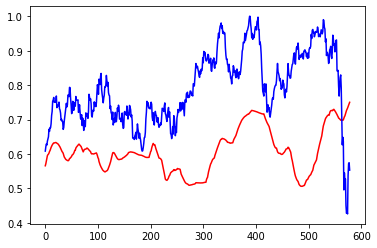

In [13]:
X_train = data[:1000]
X_test = data[1000:]
y_train = pred[:1000]
y_test = pred[1000:]

Svr = svm.SVR()
print(len(pred))
Svr.fit(X_train, y_train)

Pred = Svr.predict(X_test)
print(mean_squared_error(y_test, Pred))

plt.plot(range(len(Pred)),Pred, color = 'red')
plt.plot(range(len(Pred)),y_test,color='blue')
plt.show()

In [14]:
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Lambda, Dropout, BatchNormalization


Using TensorFlow backend.


In [15]:
print(np.array(X_train).shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = np.array(X_train).reshape((np.array(X_train).shape[0], 1,np.array(X_train).shape[1]))
test_X = np.array(X_test).reshape((np.array(X_test).shape[0], 1, np.array(X_test).shape[1]))


model = Sequential()
model.add(LSTM(180, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(BatchNormalization())
model.add(LSTM(units=90, return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(units=30))
model.add(Dense(units=1, activation='relu'))

model.compile(loss='mae', optimizer='adam', metrics=['mse'])
model.summary()

(1000, 330)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 180)            367920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 180)            720       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 90)             97560     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 90)             360       
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                14520     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 481,111
Trainable params: 480,571
Non-trainable params: 540
__________________________________

In [16]:
model.fit(train_X,np.array(y_train), epochs=50, batch_size=128,shuffle = False,validation_split=0.4)

Train on 600 samples, validate on 400 samples
Epoch 1/50


InternalError:  Blas GEMM launch failed : a.shape=(128, 180), b.shape=(180, 720), m=128, n=720, k=180
	 [[{{node lstm_1/while/body/_1/MatMul_1}}]] [Op:__inference_keras_scratch_graph_4861]

Function call stack:
keras_scratch_graph


0.35590416


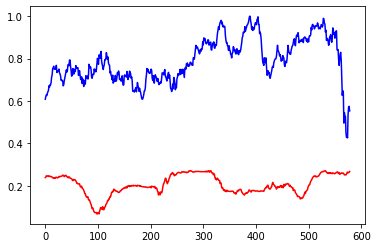

In [351]:
Pred = model.predict(test_X)
print(mean_squared_error(y_test, Pred))

plt.plot(range(len(Pred)),Pred, color = 'red')
plt.plot(range(len(Pred)),y_test,color='blue')
plt.show()


In [352]:
model = Sequential()
model.add(LSTM(180, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(units=90, return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(units=30))
model.add(Dense(1, activation='relu'))

model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_163 (LSTM)              (None, 1, 180)            367920    
_________________________________________________________________
batch_normalization_97 (Batc (None, 1, 180)            720       
_________________________________________________________________
dropout_28 (Dropout)         (None, 1, 180)            0         
_________________________________________________________________
lstm_164 (LSTM)              (None, 1, 90)             97560     
_________________________________________________________________
batch_normalization_98 (Batc (None, 1, 90)             360       
_________________________________________________________________
lstm_165 (LSTM)              (None, 30)                14520     
_________________________________________________________________
dense_55 (Dense)             (None, 1)               

In [353]:
y_train = binary_pred[:1000]
y_test = binary_pred[1000:]

model.fit(train_X,np.array(y_train), epochs=5, batch_size=128,shuffle = True,validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/5
900/900 [==============================] - 2s 2ms/step - loss: 0.2858 - accuracy: 0.7367 - val_loss: 0.9035 - val_accuracy: 0.0800
Epoch 2/5
900/900 [==============================] - 0s 198us/step - loss: 0.1663 - accuracy: 0.8733 - val_loss: 0.8995 - val_accuracy: 0.0800
Epoch 3/5
900/900 [==============================] - 0s 213us/step - loss: 0.1549 - accuracy: 0.8933 - val_loss: 0.9027 - val_accuracy: 0.0800
Epoch 4/5
900/900 [==============================] - 0s 229us/step - loss: 0.1308 - accuracy: 0.9156 - val_loss: 0.9025 - val_accuracy: 0.0800
Epoch 5/5
900/900 [==============================] - 0s 212us/step - loss: 0.1247 - accuracy: 0.9133 - val_loss: 0.9010 - val_accuracy: 0.0800


In [354]:

print('Accuracy : ', model.evaluate(np.array(test_X),np.array(y_test))[1])

579/579 [==============================] - 0s 152us/step
Accuracy :  0.35405871272087097
